# Kalman filtering benchmark 

In [1]:
%load_ext autoreload
%autoreload 2

### Import packages

In [2]:
import logging
import matplotlib.pyplot as plt

from logger import logger
from fileops import loadtif
from viewers import view_stack
from plotters import plot_stack_summary_frames
from filters import KalmanDenoiser

logger.setLevel(logging.INFO)

### Load raw image stack

 03/01/2022 09:29:29: loaded (100, 256, 170) uint8 stack from "../../data/misc/insulinoma_raw.tif"
 03/01/2022 09:29:29: initializing stack viewer
 03/01/2022 09:29:29: stack size: (90, 256, 170)
 03/01/2022 09:29:29: computing stack intensity range across 0 - 89 frame range...


100%|██████████| 90/90 [00:00<00:00, 6412.98it/s]

 03/01/2022 09:29:29: intensity range: 0 - 35
 03/01/2022 09:29:29: rendering stack view...


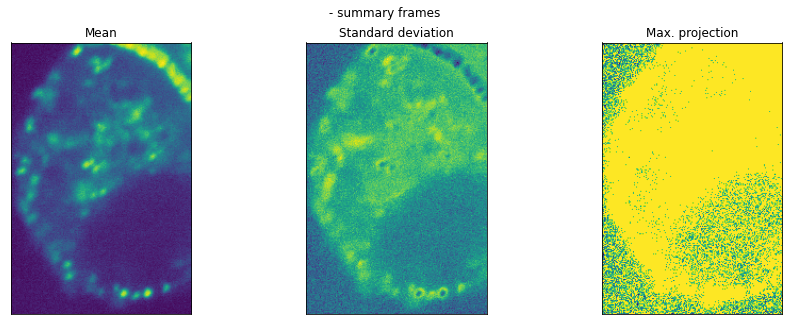

In [3]:
fpath = '../../data/misc/insulinoma_raw.tif'
stack = loadtif(fpath)[10:]
fig = plot_stack_summary_frames(stack)
view_stack({'raw': stack}, title='Raw')

### Generate and visualize padding baseline

 03/01/2022 09:29:29: constructing 10-frames baseline from 90-frames stack...
 03/01/2022 09:29:29: initializing stack viewer
 03/01/2022 09:29:29: stack size: (10, 256, 170)
 03/01/2022 09:29:29: computing stack intensity range across 0 - 9 frame range...


100%|██████████| 10/10 [00:00<00:00, 10916.98it/s]

 03/01/2022 09:29:29: intensity range: 0.0 - 35.0
 03/01/2022 09:29:29: rendering stack view...


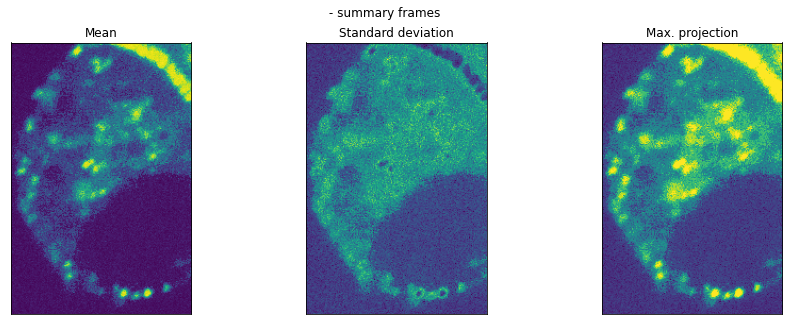

In [4]:
npad = 10
baseline = KalmanDenoiser.get_baseline(stack, npad)
fig = plot_stack_summary_frames(baseline)
view_stack(baseline)

### Apply Kalman filtering and compare outputs

 03/01/2022 09:29:29: constructing 10-frames baseline from 90-frames stack...
 03/01/2022 09:29:30: filtering 90-frames stack with KalmanDenoiser(gain=0.8, var=0.05, npad=10)


100%|██████████| 99/99 [00:00<00:00, 3716.92it/s]

 03/01/2022 09:29:30: initializing stack viewer
 03/01/2022 09:29:30: stack size: (90, 256, 170)
 03/01/2022 09:29:30: computing stack intensity range across 0 - 89 frame range...



100%|██████████| 90/90 [00:00<00:00, 7314.65it/s]

 03/01/2022 09:29:30: intensity range: 0 - 35



100%|██████████| 90/90 [00:00<00:00, 11598.22it/s]

 03/01/2022 09:29:30: intensity range: 0 - 34
 03/01/2022 09:29:30: rendering stack view...


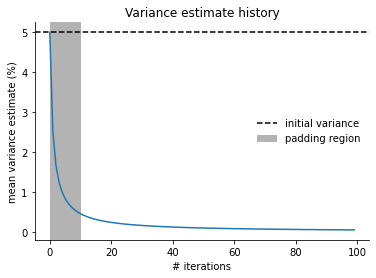

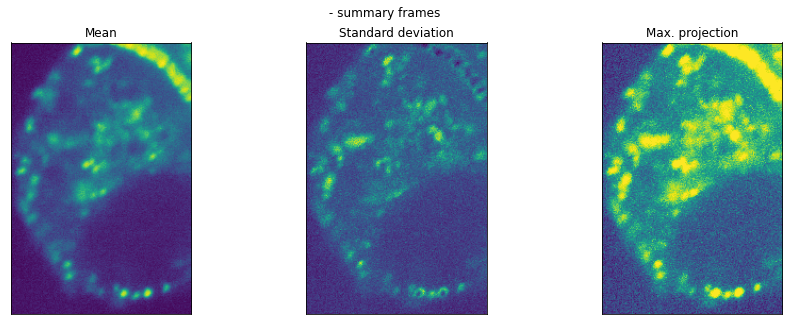

In [5]:
kd = KalmanDenoiser(G=0.8, V=0.05, npad=npad)
filtered_stack, ex_history = kd.run(stack, full_output=True)
fig1 = kd.plot_variance_history(ex_history);
fig2 = plot_stack_summary_frames(filtered_stack);
view_stack({'raw': stack, 'filtered': filtered_stack}, title=kd)